In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn import metrics
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [2]:
# LASSO REGRESSION() algorithm according to paper 
# 1. data ←read (‘data.csv’) 
# 2. (train_features,train_stock_price)← training_function() 
# 3. (test_features,test_stock_price)←testing_function() 
# 4. Model←LASSO_train(train_features ,train_stock_price, lambda) 
# 5. stock_price_predict← LASSO_predict(train_features) 
# 6. MAPE ← mean [abs{(test_stock_price – stock_price_predict)/test_stock_price}] * 100 
# 7. RMSE ← sqrt [mean{(test_stock_price – stock_price_predict)2}] 

In [3]:
# Reading the Datapoints from the CSV file
df = pd.read_csv('./csv-files/yahoo_finance/GS.csv')
print(df)
print(df.info())
print('Number of trading days: ',df.shape) # In this case, 3692

            Date        Open        High         Low       Close   Adj Close  \
0      04/5/1999   76.000000   77.250000   70.000000   70.375000   52.507099   
1      05/5/1999   69.875000   69.875000   66.250000   69.125000   51.574448   
2      06/5/1999   68.000000   69.375000   67.062500   67.937500   50.688473   
3      07/5/1999   67.937500   74.875000   66.750000   74.125000   55.304993   
4      10/5/1999   73.375000   73.500000   70.250000   70.687500   52.740234   
...          ...         ...         ...         ...         ...         ...   
3687  27/12/2013  176.389999  176.449997  175.570007  176.350006  150.962372   
3688  30/12/2013  176.500000  177.119995  175.259995  175.729996  150.431671   
3689  31/12/2013  176.220001  177.440002  176.220001  177.259995  151.741409   
3690   02/1/2014  176.949997  178.380005  176.360001  176.889999  151.424683   
3691   03/1/2014  176.350006  178.850006  176.220001  178.149994  152.503250   

        Volume  
0     22320900  
1    

In [4]:
# 6. MAPE ← mean [abs{(test_stock_price – stock_price_predict)/test_stock_price}] * 100 
def calculate_mape(stock_actual_price, stock_price_predict):
    
    # n = total number of training days
    # p = is the predicted stock price
    # i = day of the stock
    # y = actual stock price
    
    # return (np.mean(np.abs((stock_actual_price[i] - stock_price_predict[i])/stock_actual_price[i] for i in range(len(stock_actual_price))))/n) * 100
    return np.mean(np.abs((stock_actual_price - stock_price_predict)/stock_actual_price)) * 100 

# 7. RMSE ← sqrt [mean{(test_stock_price – stock_price_predict)2}] 
def calculate_rmse(stock_actual_price, stock_price_predict):
    
    # n = total number of training days
    # p = is the predicted stock price
    # i = day of the stock
    # y = actual stock price

    # return np.sqrt(mean((stock_actual_price[i] - stock_price_predict[i])**2 for i in range(len(stock_price_predict)))/n)
    return np.sqrt(np.mean((stock_actual_price - stock_price_predict)**2))

In [5]:
# Preprocessing of data
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df.drop('Date', inplace=True, axis=1)

In [6]:
# We want to predict close price using the best features
X = df.drop(['Close','Volume'], axis=1)
y_b = df['Close']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_b,test_size=0.3, shuffle=False,random_state=2)

### RECREATING LASSO 

In [8]:
print(X.head())
print(y_b.head())

               Open    High      Low  Adj Close
Date                                           
1999-05-04  76.0000  77.250  70.0000  52.507099
1999-05-05  69.8750  69.875  66.2500  51.574448
1999-05-06  68.0000  69.375  67.0625  50.688473
1999-05-07  67.9375  74.875  66.7500  55.304993
1999-05-10  73.3750  73.500  70.2500  52.740234
Date
1999-05-04    70.3750
1999-05-05    69.1250
1999-05-06    67.9375
1999-05-07    74.1250
1999-05-10    70.6875
Name: Close, dtype: float64


In [9]:
# Creating the Lasso model and training the Model

LS = Lasso()
LS.fit(X_train, y_train)

C:\Users\Nic\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.824e+02, tolerance: 5.426e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [10]:
# Doing the prediction

lasso_pred = LS.predict(X_test)

In [11]:
# Concatenating the results

close = pd.DataFrame(df['Close'].tail(len(lasso_pred)))
close['Predictions'] = lasso_pred
close.head()

,Close,Predictions
Date,,
2009-08-11,159.220001,161.468343
2009-08-12,163.759995,163.810278
2009-08-13,164.479996,165.421484
2009-08-14,162.729996,163.882771
2009-08-17,157.250000,159.287697


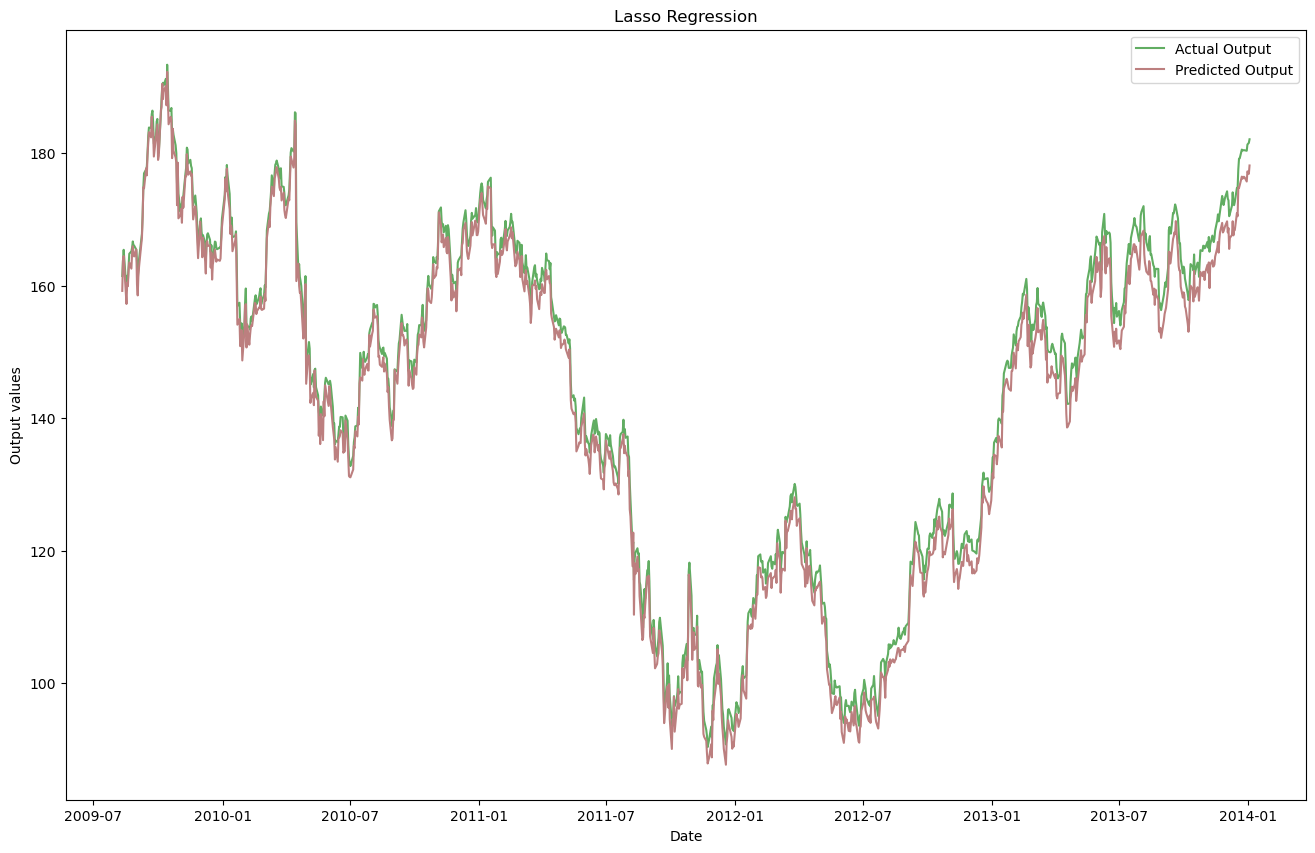

In [12]:
plt.figure(figsize= (16,10))
plt.title('Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Output values')
plt.plot(close[['Predictions']],color='#61ad62')
plt.plot(close[['Close']],color='#bc7f7f')
plt.legend(['Actual Output','Predicted Output'], loc='upper right')
plt.show()

In [13]:
scatter_x = close['Close'].mean()
scatter_y = close['Predictions'].mean()
acc = scatter_x/scatter_y*100
print("Accuracy score:", acc)

Accuracy score: 98.30634576710253


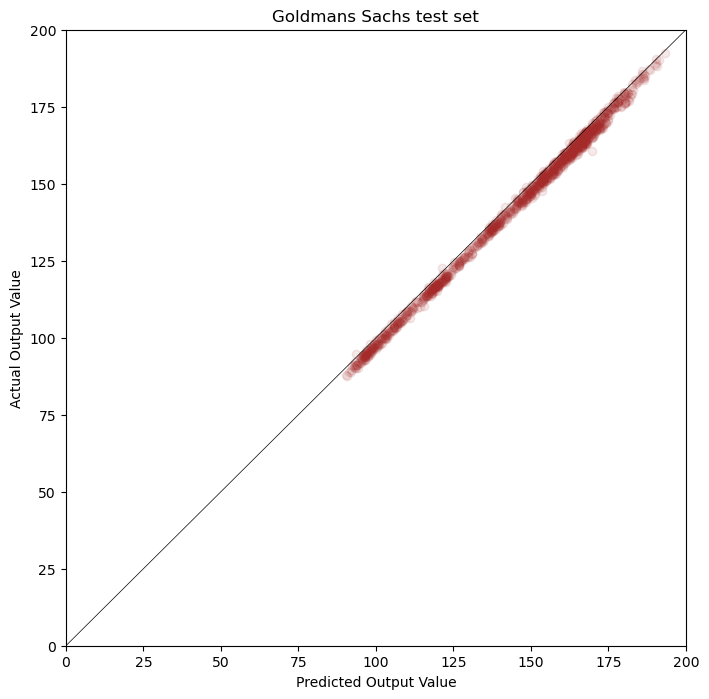

In [14]:
fig, ax = plt.subplots(figsize= (8,8))
plt.axis([0, 200, 0, 200])

line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=0.5 )
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title('Goldmans Sachs test set')
plt.scatter(close['Predictions'],close['Close'],  color='#A52B2A', alpha = 0.1)
plt.ylabel("Actual Output Value")
plt.xlabel("Predicted Output Value")
plt.show()

In [15]:
# Calculating the metrics

print(close[['Close', 'Predictions']])
c_lasso = close[['Close']]
p_lasso = close[['Predictions']]

                 Close  Predictions
Date                               
2009-08-11  159.220001   161.468343
2009-08-12  163.759995   163.810278
2009-08-13  164.479996   165.421484
2009-08-14  162.729996   163.882771
2009-08-17  157.250000   159.287697
...                ...          ...
2013-12-27  176.350006   180.445568
2013-12-30  175.729996   180.370612
2013-12-31  177.259995   181.311388
2014-01-02  176.889999   181.562572
2014-01-03  178.149994   182.104615

[1108 rows x 2 columns]


In [16]:
#TEST VALUES LASSO model

lasso_test_rmse = calculate_rmse(c_lasso.values,p_lasso.values)
lasso_test_mape = calculate_mape(c_lasso.values,p_lasso.values)

In [17]:
#Training VALUES LASSO model
lasso_pred_train = LS.predict(X_train)

lasso_train_rmse = calculate_rmse(y_train,lasso_pred_train)
lasso_train_mape = calculate_mape(y_train,lasso_pred_train)

In [18]:
# The results

print("LASSO - TRAIN RMSE: ", lasso_train_rmse, 'TEST RMSE: ', lasso_test_rmse)
print("LASSO - TRAIN MAPE: ", lasso_train_mape, 'TEST MAPE: ', lasso_test_mape)

LASSO - TRAIN RMSE:  1.1573221607370225 TEST RMSE:  2.683419965637699
LASSO - TRAIN MAPE:  0.7219542976681284 TEST MAPE:  1.807165033573364


In [19]:
predictions_train = LS.predict(X_train)
# print(predictions_train)
data_pre = df[['Close']].copy()
print(data_pre)
valid = data_pre[:len(X_train)]
valid['Predictions'] = predictions_train

print(valid)

scatter_x = valid['Close'].mean()
scatter_y = valid['Predictions'].mean()
acc = scatter_x/scatter_y*100
print("Accuracy score:", acc)

                 Close
Date                  
1999-05-04   70.375000
1999-05-05   69.125000
1999-05-06   67.937500
1999-05-07   74.125000
1999-05-10   70.687500
...                ...
2013-12-27  176.350006
2013-12-30  175.729996
2013-12-31  177.259995
2014-01-02  176.889999
2014-01-03  178.149994

[3692 rows x 1 columns]
                 Close  Predictions
Date                               
1999-05-04   70.375000    72.429977
1999-05-05   69.125000    68.249107
1999-05-06   67.937500    67.992578
1999-05-07   74.125000    71.629592
1999-05-10   70.687500    71.288707
...                ...          ...
2009-08-04  165.169998   165.748583
2009-08-05  168.639999   168.616319
2009-08-06  166.750000   169.102996
2009-08-07  163.649994   166.182072
2009-08-10  160.360001   162.494741

[2584 rows x 2 columns]
Accuracy score: 99.9999999999998


C:\Users\Nic\AppData\Local\Temp\ipykernel_11708\1893431490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_train


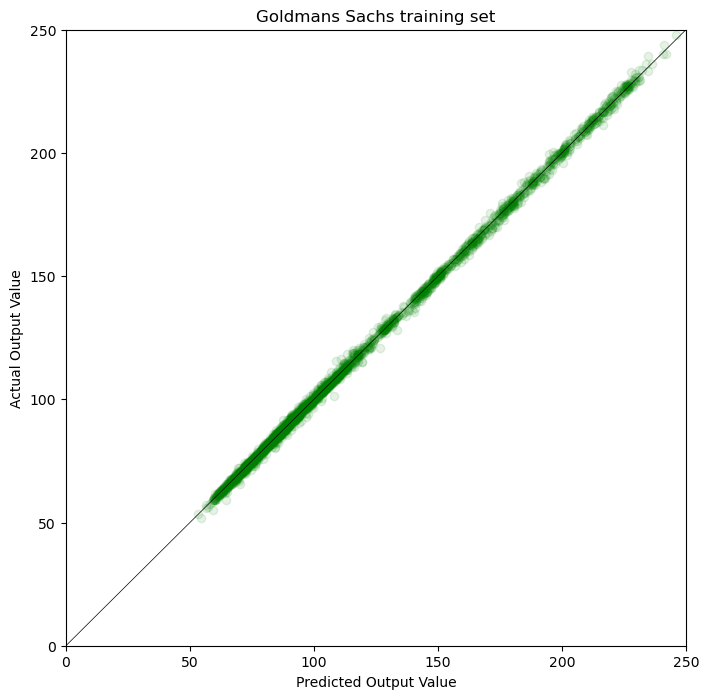

In [20]:
fig, ax = plt.subplots(figsize= (8,8))
plt.axis([0, 250, 0, 250])

line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=0.5 )
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title('Goldmans Sachs training set')
plt.scatter(valid['Predictions'],valid['Close'],  color='g', alpha = 0.1)
plt.ylabel("Actual Output Value")
plt.xlabel("Predicted Output Value")
plt.show()

### RECREATING RIDGE

In [21]:
# We want to predict close price using the best features
X2 = df.drop(['Close','Volume','Open'], axis=1)
y_b2 = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X2, y_b2,test_size=0.30, shuffle=False)

In [22]:
# Creating the Ridge model and training the Model

RD = Ridge()
RD.fit(X_train, y_train)

Ridge()

In [23]:
# Doing the prediction

ridge_pred = RD.predict(X_test)

In [24]:
# Concatenating the results

close = pd.DataFrame(df['Close'].tail(len(ridge_pred)))
close['Predictions'] = ridge_pred
close.head()

,Close,Predictions
Date,,
2009-08-11,159.220001,161.857213
2009-08-12,163.759995,164.545044
2009-08-13,164.479996,166.061186
2009-08-14,162.729996,164.456269
2009-08-17,157.250000,159.742815


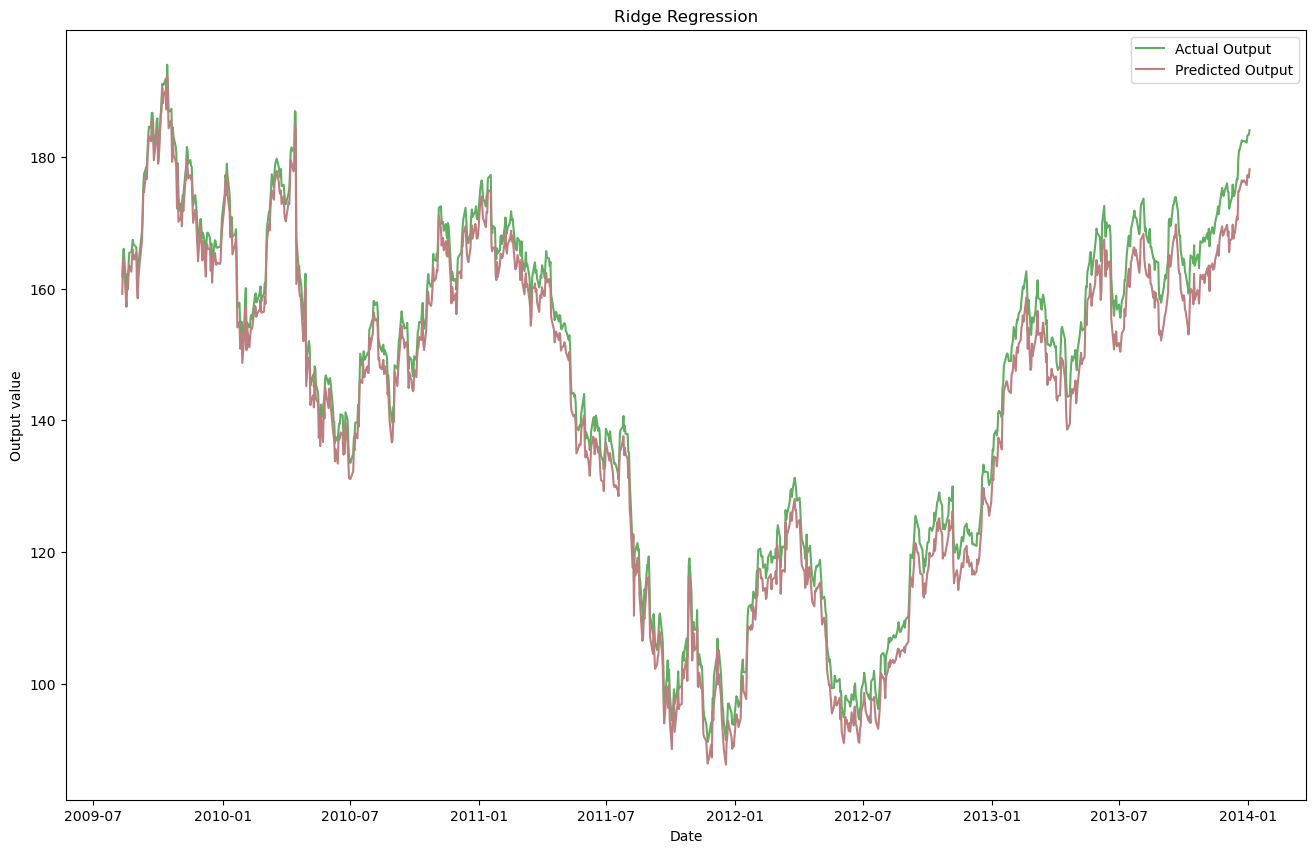

In [25]:
valid = pd.DataFrame()

plt.figure(figsize= (16,10))
plt.title('Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Output value')
plt.plot(close[['Predictions']],color='#61ad62')
plt.plot(close[['Close']],color='#bc7f7f')
plt.legend(['Actual Output','Predicted Output'], loc='upper right')
plt.show()

In [26]:
scatter_x = close['Close'].mean()
scatter_y = close['Predictions'].mean()
acc = scatter_x/scatter_y*100
print("Accuracy score:", acc)

Accuracy score: 97.61541606719858


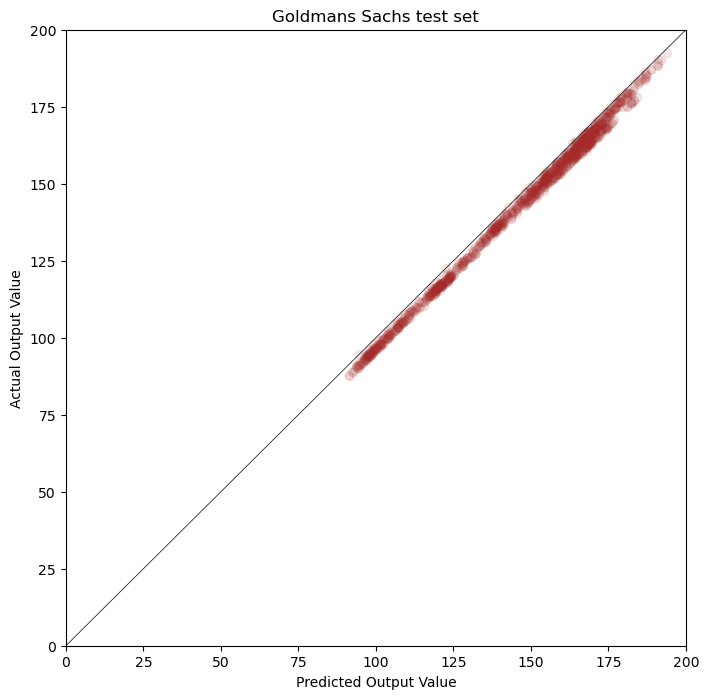

In [27]:
fig, ax = plt.subplots(figsize= (8,8))
plt.axis([0, 200, 0, 200])

line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=0.5 )
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title('Goldmans Sachs test set')
plt.scatter(close['Predictions'],close['Close'],  color='#A52B2A', alpha = 0.1)
plt.ylabel("Actual Output Value")
plt.xlabel("Predicted Output Value")
plt.show()

In [28]:
# Calculating the metrics

print(close[['Close', 'Predictions']])
c_ridge = close[['Close']]
p_ridge = close[['Predictions']]

                 Close  Predictions
Date                               
2009-08-11  159.220001   161.857213
2009-08-12  163.759995   164.545044
2009-08-13  164.479996   166.061186
2009-08-14  162.729996   164.456269
2009-08-17  157.250000   159.742815
...                ...          ...
2013-12-27  176.350006   182.428991
2013-12-30  175.729996   182.207528
2013-12-31  177.259995   183.299287
2014-01-02  176.889999   183.398907
2014-01-03  178.149994   184.065977

[1108 rows x 2 columns]


In [29]:
#TEST VALUES LASSO model

ridge_test_rmse = calculate_rmse(c_ridge.values,p_ridge.values)
ridge_test_mape = calculate_mape(c_ridge.values,p_ridge.values)

In [30]:
#Training VALUES LASSO model
ridge_pred_train = RD.predict(X_train)

ridge_train_rmse = calculate_rmse(y_train,ridge_pred_train)
ridge_train_mape = calculate_mape(y_train,ridge_pred_train)

In [31]:
# The results

print("RIDGE - TRAIN RMSE: ", ridge_train_rmse, 'TEST RMSE: ', ridge_test_rmse) 
print("RIDGE - TRAIN MAPE: ", ridge_train_mape, 'TEST MAPE: ', ridge_test_mape)

RIDGE - TRAIN RMSE:  1.1197980967774785 TEST RMSE:  3.695779755604444
RIDGE - TRAIN MAPE:  0.7092340433294679 TEST MAPE:  2.540369816235311


In [32]:
predictions_train = RD.predict(X_train)
# print(predictions_train)
data_pre = df[['Close']].copy()
print(data_pre)
valid = data_pre[:len(X_train)]
valid['Predictions'] = predictions_train

print(valid)

scatter_x = valid['Close'].mean()
scatter_y = valid['Predictions'].mean()
acc = scatter_x/scatter_y*100
print("Accuracy score:", acc)

                 Close
Date                  
1999-05-04   70.375000
1999-05-05   69.125000
1999-05-06   67.937500
1999-05-07   74.125000
1999-05-10   70.687500
...                ...
2013-12-27  176.350006
2013-12-30  175.729996
2013-12-31  177.259995
2014-01-02  176.889999
2014-01-03  178.149994

[3692 rows x 1 columns]
                 Close  Predictions
Date                               
1999-05-04   70.375000    71.703072
1999-05-05   69.125000    68.233740
1999-05-06   67.937500    67.869728
1999-05-07   74.125000    71.671049
1999-05-10   70.687500    70.984027
...                ...          ...
2009-08-04  165.169998   166.470511
2009-08-05  168.639999   169.379757
2009-08-06  166.750000   169.388728
2009-08-07  163.649994   166.419227
2009-08-10  160.360001   162.850658

[2584 rows x 2 columns]
Accuracy score: 99.99999999999996


C:\Users\Nic\AppData\Local\Temp\ipykernel_11708\1821721584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_train


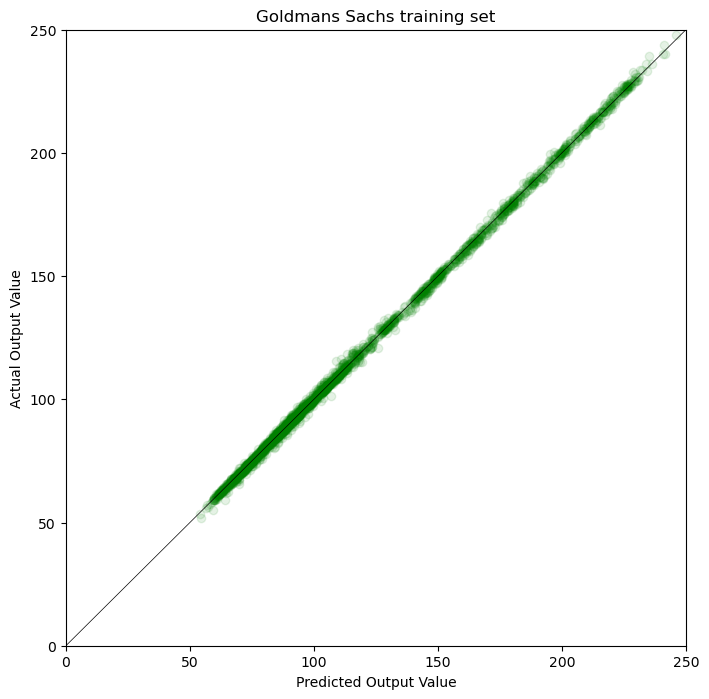

In [33]:
fig, ax = plt.subplots(figsize= (8,8))
plt.axis([0, 250, 0, 250])

line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=0.5 )
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title('Goldmans Sachs training set')
plt.scatter(valid['Predictions'],valid['Close'],  color='g', alpha = 0.1)
plt.ylabel("Actual Output Value")
plt.xlabel("Predicted Output Value")
plt.show()